In [ ]:
import matplotlib.pyplot as plt    # import matplotlib
import numpy as np                 # import numpy
import time                        # import time
import ipywidgets as widgets       # interactive display
from scipy.stats import pearsonr   # import pearson correlation

fig_w, fig_h = 8, 6
my_fontsize = 18
my_params = {'axes.labelsize': my_fontsize,
          'axes.titlesize': my_fontsize,
          'figure.figsize': (fig_w, fig_h),
          'font.size': my_fontsize,
          'legend.fontsize': my_fontsize-4,
          'lines.markersize': 8.,
          'lines.linewidth': 2.,
          'xtick.labelsize': my_fontsize-2,
          'ytick.labelsize': my_fontsize-2}

plt.rcParams.update(my_params)
my_layout = widgets.Layout()

# Auto Reloading
%load_ext autoreload
%autoreload 2

# %matplotlib widget

### Network of LIFs

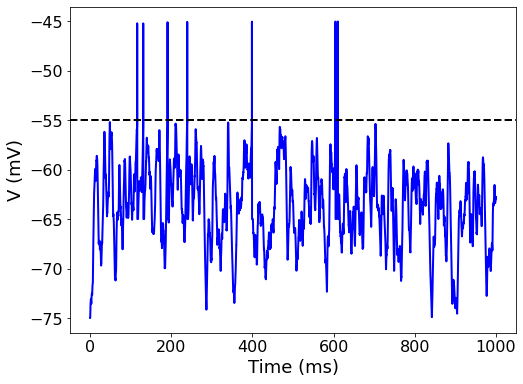

In [33]:
from lib.neuron import LIF
from lib.input import Poisson_generator, Gaussian_generator
from lib.conn import Simulator
from lib.helper import plot_volt_trace

T, dt = 1e3, 0.1
wt = 1.
rt = 1e3

# simualtor
h = Simulator(dt=dt)

# neurons
nrn = LIF(sim=h)

# inputs
exc_in = Poisson_generator(sim=h, rate=rt)
inh_in = Poisson_generator(sim=h, rate=rt)

# connection
nrn.connect(exc_in, {'weight': wt})
nrn.connect(inh_in, {'weight': -wt})

# simulate|
h.run(T)

# visualize
plt_par = {'dt':dt, 'range_t':np.arange(0., T, dt), 'V_th':-55.}
plot_volt_trace(plt_par, nrn.v, np.array(nrn.rec_spikes))

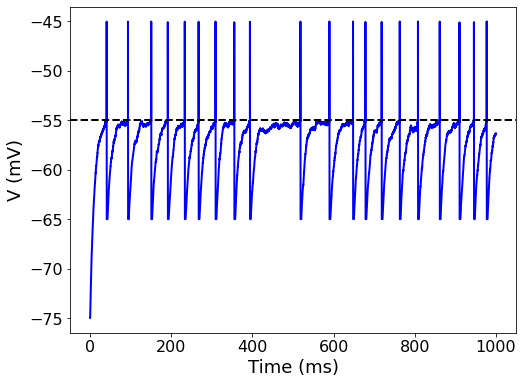

In [37]:
T, dt = 1e3, 0.1
N = 10
mean, std = 200., 40.
wt = 1.

# simualtor
h = Simulator(dt=dt)

# network of neurons
nrns = [LIF(sim=h) for _ in range(N)]

# background noise
noises = [Gaussian_generator(sim=h, mean=mean, std=std) for _ in range(N)]
for noise, nrn in zip(noises, nrns):
    nrn.connect(noise, {'weight':1.})

# recurrent connections
# h.connect(nrns, nrns, {'weight': np.random.rand(N,N)*(np.random.rand(N,N)<0.5), 'delay': np.random.uniform(2., 5., (N,N))})

# simulation
h.run(T)

# visualize
plt_par = {'dt':dt, 'range_t':np.arange(0., T, dt), 'V_th':-55.}
plot_volt_trace(plt_par, nrns[0].v, np.array(nrns[0].rec_spikes))